In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

import re

In [14]:
data = pd.read_csv('train_titanic.csv')

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.columns = data.columns.str.lower()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
for i in range(len(data.name)):
    arr = re.split(", Mr. |, Miss. |, Mrs. ", str(data.name[i]))
    data.loc[i,'surname'] = arr[0]
    if len(arr) >1:
        data.loc[i,'short_name'] = arr[1]

In [19]:
data['sex'].replace({'female':0,'male':1}, inplace=True)

In [8]:
data = data.drop(['name', 'ticket', 'cabin', 'passengerid'], axis = 1)

In [10]:
features = ["pclass", "sex", "sibsp", "parch"]
pd.get_dummies(data[features]).sample(5)

,pclass,sex,sibsp,parch
586,2,1,0,0
779,1,0,0,1
171,3,1,4,1
842,1,0,0,0
551,2,1,0,0


In [11]:
data.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [12]:
data = data.join(pd.get_dummies(data.embarked, prefix='port')).drop(['embarked'], axis = 1)

In [13]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,surname,short_name,port_C,port_Q,port_S
0,0,3,1,22.0,1,0,7.2500,Braund,Owen Harris,0,0,1
1,1,1,0,38.0,1,0,71.2833,Cumings,John Bradley (Florence Briggs Thayer),1,0,0
2,1,3,0,26.0,0,0,7.9250,Heikkinen,Laina,0,0,1
3,1,1,0,35.0,1,0,53.1000,Futrelle,Jacques Heath (Lily May Peel),0,0,1
4,0,3,1,35.0,0,0,8.0500,Allen,William Henry,0,0,1


In [13]:
data['age'].fillna(np.mean(data['age']), inplace = True)

In [14]:
# корреляция здесь не подойдет

In [15]:
data['sibex'] = data['sibsp'].apply(lambda x: 1 if x!=0 else 0)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   surname     891 non-null    object 
 8   short_name  824 non-null    object 
 9   port_C      891 non-null    uint8  
 10  port_Q      891 non-null    uint8  
 11  port_S      891 non-null    uint8  
 12  sibex       891 non-null    int64  
dtypes: float64(2), int64(6), object(2), uint8(3)
memory usage: 72.3+ KB


# heatmap попробуем 

In [17]:
col = [col for col in data.columns if ('port' not in col) and ('name' not in col)]
data[col].head()

,survived,pclass,sex,age,sibsp,parch,fare,sibex
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


проверить, если признаки 'pclass' и 'fare' зависимы \
ans.: не зависимы, можно оставить обы признака

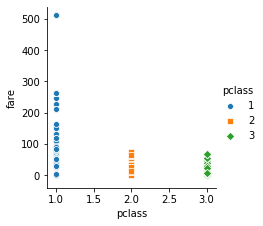

In [18]:
g = sns.pairplot(data, x_vars = 'pclass', y_vars = 'fare', hue = 'pclass', markers=["o", "s", "D"],\
                 height = 3, diag_kind = None)
plt.show()

# чем отличаются люди, которые выжили и которые утонули

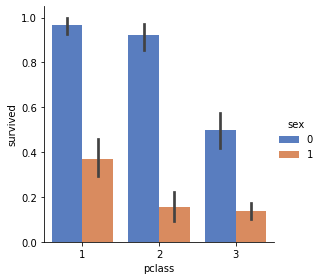

In [19]:
# класс билета
g = sns.catplot(x="pclass", y="survived", hue ='sex', data=data,
                height=4, kind="bar", palette="muted")

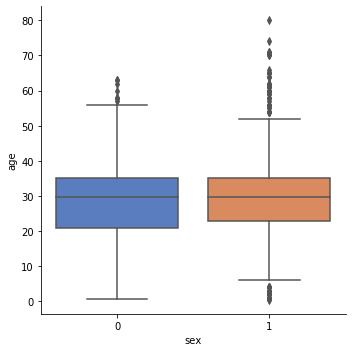

In [20]:
# возраст всех пассажиров
sns.catplot(x="sex", y="age", kind="box", data=data, palette="muted");

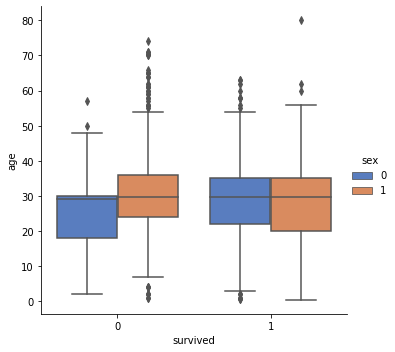

In [21]:
# для возраста нагляднее построить ящики с усами
sns.catplot(x="survived", y="age", hue ='sex', kind="box", data=data, palette="muted");

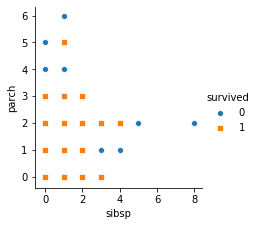

In [22]:
# наличие родственников на борту
g = sns.pairplot(data, x_vars = 'sibsp', y_vars = 'parch', hue = 'survived', markers=["o", "s"],\
                 height = 3, diag_kind = None)
plt.show()

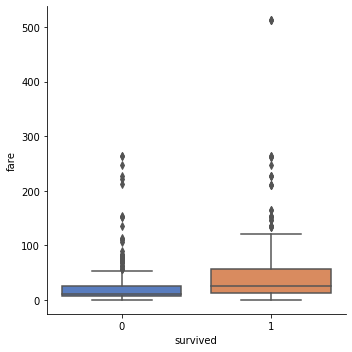

In [23]:
# плата за билет
sns.catplot(x="survived", y="fare", kind="box", data=data, palette="muted");
# у выживших плата за проезд существенно выше, чем у утонувших

In [24]:
# пол
women = data.loc[data.sex == 0]["survived"]
rate_women = sum(women)/len(women)

print("# of women who survived:", rate_women)

# of women who survived: 0.7420382165605095


In [25]:
men = data.loc[data.sex == 1]["survived"]
rate_men = sum(men)/len(men)

print("# of men who survived:", rate_men)

# of men who survived: 0.18890814558058924


# план
решающее дерево  
метод ближайших соседей 

метод опорных векторов (только если линейно разделима выборка) \
логистическая регрессия 


градиентный бустинг \
случайный лес

нейронные сети
_______________
(кросс-валидация)

# дерево решений (логический метод)

In [26]:
y = data['survived']
X = data.drop(['survived','surname','short_name', 'sibex'], axis=1)

In [27]:
X.head()

,pclass,sex,age,sibsp,parch,fare,port_C,port_Q,port_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits = 5, random_state=42, shuffle=True)

for depth in [2,3,4,5]:
    model_tree = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(model_tree, X = X, y = y, cv = kf, scoring = 'accuracy')
    score_norm = np.mean(score, axis=0)
    print('depth - {}, score - {}'.format(depth, score_norm))

depth - 2, score - 0.7777917268219195
depth - 3, score - 0.815956311593748
depth - 4, score - 0.82045069361622
depth - 5, score - 0.8148327160881301


In [29]:
# from sklearn.tree import export_graphviz

In [30]:
# export_graphviz(model_tree, feature_names = ['pclass','sex','age','sibsp','parch','fare','port_C','port_Q',\
#                                              'port_S','sibex'], out_file = 'tree.dot', filled = True)

# ближайшие соседи (метрический метод)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# без масштбаирования результат не очень
score_ar = np.array([])
for k in range(1,51):
    k_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(k_classifier, X=X, y=y, cv = kf, scoring = 'accuracy')
    score_norm = np.mean(score, axis = 0)
    score_ar = np.append(score_ar, score_norm)
k_optimal = np.argmax(score_ar)+1
print('k - {}, score - {}'.format(k_optimal, score_ar[k_optimal-1]))

k - 19, score - 0.7081601908229238


In [33]:
# с масштабирвоанием лучше
from sklearn.preprocessing import scale 
# то же самое6 что StandardScaler
scaled_X = scale(X)

score_ar = np.array([])
for k in range(1,51):
    k_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(k_classifier, X = scaled_X, y=y, cv = kf, scoring = 'accuracy')
    score_norm = np.mean(score, axis=0) #or average
    score_ar = np.append(score_ar, score_norm)
k_optimal = np.argmax(score_ar)+1
print (k_optimal)
print('k - {}, score - {}'.format(k_optimal, score_ar[k_optimal-1]))

8
k - 8, score - 0.8238089259933463


# логистическая регрессия (линейный метод)

In [34]:
# здесь можно попдобрать обратный коэффициент регуляризации
# смысла в этом нет
# сразу надо масштабировать данные или сильно увеличивать max_iter
from sklearn.linear_model import LogisticRegression

for c in np.logspace(-2,2, num = 5):
    clf_lr = LogisticRegression(C = c)
    score = cross_val_score(clf_lr, X = scaled_X, y = y, cv = kf, scoring = 'accuracy')
    score_norm = np.mean(score, axis=0)
    print('c - {}, score - {}'.format(c, score_norm))

c - 0.01, score - 0.8092147385600402
c - 0.1, score - 0.8013558470905782
c - 1.0, score - 0.8024606113866047
c - 10.0, score - 0.8002134203753688
c - 100.0, score - 0.8002134203753688


# случайный лес

In [36]:
from sklearn.ensemble import RandomForestClassifier

score_ar = np.array([])
estim = [10,20,30,40,50,80,100,150]
for k in estim:
    clf_rf = RandomForestClassifier(n_estimators = k, random_state = 1)
    score = cross_val_score(clf_rf, X = X, y = y, cv = kf, scoring ='accuracy')
    score_norm = np.mean(score, axis=0)
    score_ar = np.append(score_ar,score_norm)
k_optimal = np.argmax(score_ar)
print (estim[k_optimal])
print(score_ar[k_optimal])

150
0.8114430983616849


# градиентный бустинг

In [37]:
# работает быстро, ограничений на глубину не требуется
# масштабирование тоже не требуется
from sklearn.ensemble import GradientBoostingClassifier

score_ar = np.array([])
estim = [10,20,30,40,50,80,100,150]
for k in estim:
    clf = GradientBoostingClassifier(n_estimators=k, random_state=241)
    score = cross_val_score(clf, X = X, y = y, cv = kf, scoring = 'accuracy')
    score_norm = np.mean(score, axis=0)
    score_ar = np.append(score_ar,score_norm)
k_optimal = np.argmax(score_ar)
print('k - {}, score - {}'.format(estim[k_optimal], score_ar[k_optimal]))

k - 80, score - 0.8339150084740442


# проверка на тесте
### подготовка данных

In [246]:
data_test = pd.read_csv('test_titanic.csv')
data_test.columns = data_test.columns.str.lower()

In [247]:
data_test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
X_test = data_test.drop(['name', 'ticket', 'cabin', 'passengerid'], axis = 1)
X_test['sex'].replace({'female':0,'male':1}, inplace=True)

In [42]:
X_test = X_test.join(pd.get_dummies(X_test.embarked, prefix='port')).drop(['embarked'], axis = 1)

In [43]:
X_test['age'].fillna(np.mean(X_test['age']), inplace = True)
X_test['fare'].fillna(np.mean(X_test['fare']), inplace = True)

In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  418 non-null    int64  
 1   sex     418 non-null    int64  
 2   age     418 non-null    float64
 3   sibsp   418 non-null    int64  
 4   parch   418 non-null    int64  
 5   fare    418 non-null    float64
 6   port_C  418 non-null    uint8  
 7   port_Q  418 non-null    uint8  
 8   port_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


### выбор лучшей модели

In [45]:
# пусть градиентный бустинг
clf = GradientBoostingClassifier(n_estimators=80, random_state=241)
clf.fit(X, y)
y_predict = clf.predict(X_test)

In [46]:
d = {'PassengerId':data_test['passengerid'], 'Survived':y_predict}
df = pd.DataFrame(data = d)
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [47]:
df.to_csv('TITANIC_result', index = False)

In [48]:
len(df)

418

# RESULT - 0.79425

In [49]:
# idea1 - сделать из фамилий мешок слов
# idea2 - обратить внимание на зависимость от sibsp, новый признак - размер семьи
# idea3 - удалить порт посадки
# idea4 - выделить миссис и мистер из имен
# idea5 - оценивать модель не по точности (например, auc-roc)
# idea6 - заменить категориальные признаки на (label/frequency-encoding для деревьев, one-hot-encoding для линейных)

In [50]:
## idea1
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,surname,short_name,port_C,port_Q,port_S,sibex
0,0,3,1,22.0,1,0,7.2500,Braund,Owen Harris,0,0,1,1
1,1,1,0,38.0,1,0,71.2833,Cumings,John Bradley (Florence Briggs Thayer),1,0,0,1
2,1,3,0,26.0,0,0,7.9250,Heikkinen,Laina,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,Futrelle,Jacques Heath (Lily May Peel),0,0,1,1
4,0,3,1,35.0,0,0,8.0500,Allen,William Henry,0,0,1,0


In [51]:
data.surname = data.surname.apply(lambda x: x.split(',')[0])
data.surname.value_counts()

Andersson    9
Sage         7
Panula       6
Goodwin      6
Skoog        6
            ..
Lindell      1
Sivola       1
Silven       1
Bengtsson    1
Mitchell     1
Name: surname, Length: 667, dtype: int64

In [52]:
data['family_size'] = data['sibsp'] + data['parch']

In [65]:
# похоже, большие семьи имеют одинаковое значение survived
data[data.surname == 'Andersson']

,survived,pclass,sex,age,sibsp,parch,fare,surname,short_name,port_C,port_Q,port_S,sibex,family_size
13,0,3,1,39.0,1,5,31.2750,Andersson,Anders Johan,0,0,1,1,6
68,1,3,0,17.0,4,2,7.9250,Andersson,Erna Alexandra,0,0,1,1,6
119,0,3,0,2.0,4,2,31.2750,Andersson,Ellis Anna Maria,0,0,1,1,6
146,1,3,1,27.0,0,0,7.7958,Andersson,"August Edvard (""Wennerstrom"")",0,0,1,0,0
541,0,3,0,9.0,4,2,31.2750,Andersson,Ingeborg Constanzia,0,0,1,1,6
542,0,3,0,11.0,4,2,31.2750,Andersson,Sigrid Elisabeth,0,0,1,1,6
610,0,3,0,39.0,1,5,31.2750,Andersson,Anders Johan (Alfrida Konstantia Brogren),0,0,1,1,6
813,0,3,0,6.0,4,2,31.2750,Andersson,Ebba Iris Alfrida,0,0,1,1,6
850,0,3,1,4.0,4,2,31.2750,Andersson,NaN,0,0,1,1,6


In [64]:
data[data.family_size>=1].survived.value_counts()

1    179
0    175
Name: survived, dtype: int64

In [248]:
data_test['surname'] = data_test.name.apply(lambda x: x.split(',')[0])

In [249]:
data_test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,surname
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen


In [257]:
data_test.surname.value_counts()

Ware        4
Sage        4
Thomas      4
Asplund     4
Davies      4
           ..
Wenzel      1
Drapkin     1
Bird        1
Sadowitz    1
Salander    1
Name: surname, Length: 352, dtype: int64

In [268]:
## idea2
family = data.loc[data.parch != 0]["survived"]
rate_family = sum(family)/len(family)

print("# of survived people who had parents or children aboard:", round(rate_family,2))

# of survived people who had parents or children aboard: 0.51


In [267]:
sib = data.loc[data.sibsp != 0]["survived"]
rate_sib = sum(sib)/len(sib)

print("# of survived people who had siblings aboard:", round(rate_sib,2))

# of survived people who had siblings aboard: 0.47


In [70]:
## idea3
X.drop([col for col in X.columns if 'port' in col], inplace = True, axis = 1)

In [72]:
X.head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [76]:
# точность ухудшилась
clf = GradientBoostingClassifier(n_estimators=80, random_state=241)
score = cross_val_score(clf, X = X, y = y, cv = kf, scoring = 'accuracy')
score_norm = np.mean(score, axis=0)
print(score_norm)

0.8226853304877284


In [321]:
## idea4
data = pd.read_csv('train_titanic.csv')
data.columns = data.columns.str.lower()

In [322]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [323]:
data.name.apply(lambda x: x.split(', ')[1].split()[0].replace('.','')).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Lady          1
Mme           1
Ms            1
Don           1
Jonkheer      1
Sir           1
the           1
Name: name, dtype: int64

In [324]:
data['title'] = data.name.apply(lambda x: x.split(', ')[1].split()[0].replace('.',''))

In [325]:
def replace_titles(x):
    title=x['title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms', 'the']:
        return 'Miss'
    elif title =='Dr':
        if x['sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [326]:
data.title = data.apply(replace_titles, axis = 1)

In [327]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [328]:
data.title.value_counts()

Mr        537
Miss      186
Mrs       128
Master     40
Name: title, dtype: int64

In [329]:
data = data.join(pd.get_dummies(data.title, prefix='title')).drop(['title', 'name'], axis = 1)
data.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title_Master,title_Miss,title_Mr,title_Mrs
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [331]:
# заполнить пропуски можно нулями или сильно большими значениями
data['sex'].replace({'female':0,'male':1}, inplace=True)
data = data.drop(['ticket', 'cabin', 'passengerid'], axis = 1)
data = data.join(pd.get_dummies(data.embarked, prefix='port')).drop(['embarked'], axis = 1)
# data['age'].fillna(1000, inplace = True)

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   sex           891 non-null    int64  
 3   age           714 non-null    float64
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   title_Master  891 non-null    uint8  
 8   title_Miss    891 non-null    uint8  
 9   title_Mr      891 non-null    uint8  
 10  title_Mrs     891 non-null    uint8  
 11  port_C        891 non-null    uint8  
 12  port_Q        891 non-null    uint8  
 13  port_S        891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(7)
memory usage: 54.9 KB


In [334]:
# пробуем просто удалить людей без возраста (сомнительно)
data = data.dropna(axis = 0)

In [294]:
# data['family_size'] = data['sibsp'] + data['parch']

In [335]:
y = data['survived']
X = data.drop('survived', axis = 1)

In [336]:
# пробуем градиентный бустинг (max_depth=4)
# стало на 1/100 больше точности
score_ar = np.array([])
estim = [10,20,30,40,50,80,100,150]
for k in estim:
    clf = GradientBoostingClassifier(n_estimators=k, random_state=241, max_depth = 4)
    score = cross_val_score(clf, X = X, y = y, cv = kf, scoring = 'accuracy')
    score_norm = np.mean(score, axis=0)
    score_ar = np.append(score_ar,score_norm)
k_optimal = np.argmax(score_ar)
print('k - {}, score - {}'.format(estim[k_optimal], score_ar[k_optimal]))

k - 50, score - 0.8431498079385402


In [309]:
X.head()

,pclass,sex,age,sibsp,parch,fare,title_Master,title_Miss,title_Mr,title_Mrs,port_C,port_Q,port_S
0,3,1,22.0,1,0,7.2500,0,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,1,1,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,1,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [310]:
data_test = pd.read_csv('test_titanic.csv')
data_test.columns = data_test.columns.str.lower()

In [311]:
pasid = data_test.passengerid
data_test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [312]:
data_test['title'] = data_test.name.apply(lambda x: x.split(', ')[1].split()[0].replace('.',''))
data_test.title = data_test.apply(replace_titles, axis = 1)
data_test = data_test.join(pd.get_dummies(data_test.title, prefix='title')).drop(['title', 'name'], axis = 1)

In [313]:
data_test['sex'].replace({'female':0,'male':1}, inplace=True)
data_test = data_test.drop(['ticket', 'cabin', 'passengerid'], axis = 1)
data_test = data_test.join(pd.get_dummies(data_test.embarked, prefix='port')).drop(['embarked'], axis = 1)

In [314]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        418 non-null    int64  
 1   sex           418 non-null    int64  
 2   age           332 non-null    float64
 3   sibsp         418 non-null    int64  
 4   parch         418 non-null    int64  
 5   fare          417 non-null    float64
 6   title_Master  418 non-null    uint8  
 7   title_Miss    418 non-null    uint8  
 8   title_Mr      418 non-null    uint8  
 9   title_Mrs     418 non-null    uint8  
 10  port_C        418 non-null    uint8  
 11  port_Q        418 non-null    uint8  
 12  port_S        418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(7)
memory usage: 22.6 KB


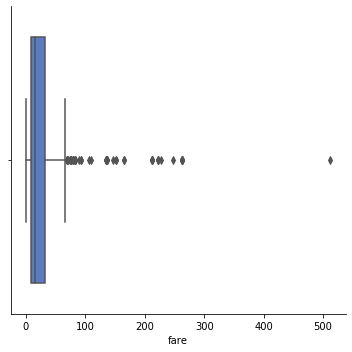

In [315]:
sns.catplot(x="fare", kind="box", data=data_test, palette="muted");

In [316]:
data_test['age'].fillna(1000, inplace = True)
data_test['fare'].fillna(1000, inplace = True)

In [317]:
# data_test['family_size'] = data_test['sibsp'] + data_test['parch']

In [318]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=241, max_depth = 4)
clf.fit(X, y)
y_predict = clf.predict(data_test)

In [319]:
d = {'PassengerId':pasid, 'Survived':y_predict}
df = pd.DataFrame(data = d)
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [320]:
df.to_csv('TITANIC_result', index = False)